# Product Seller Analysis

## 📊 BI Questions & Hypotheses Mapping

### 🔬 Hypotheses

- **H1:** Certain sellers and product categories systematically receive more negative reviews, impacting satisfaction and revenue.
- **H2:** Delivery delays and order values influence customer review outcomes.
- **H3:** Poor customer satisfaction leads to financial losses from churn and lost future revenue.

| **BI Question** | **Related Hypothesis** | **Business Insight** |
|------------------|-------------------------|------------------------|
| What is the average review score by product? | H1 | Product category satisfaction drivers |
| Which sellers receive the most 1-star and 5-star reviews? | H1 | Seller performance risk zones |
| Do review scores vary with delivery time or order value? | H2 | Delivery & pricing impacts on satisfaction |
| Are there product categories that drive dissatisfaction? | H1 | Product category quality risks |
| What is the revenue risk of poor reviews? | H3 | Financial impact of poor satisfaction |




## 📌 Modeling Assumptions Declaration — Product & Seller Performance

| **Initiative** | **Assumption Basis** | **Reason for Assumption** |
|----------------|----------------------|---------------------------|
| Lost Revenue from Low-Rated Orders (1-2 stars) | ~$2,543,556/year | Based on total order volume receiving 1-2 star reviews, multiplied by average order value (price + freight) identified in dataset. |
| Lost Profit Margin (Low-Rated Orders) | ~$635,889/year | Applies estimated average profit margin (25%) to lost revenue from dissatisfied orders. |
| Lifetime Revenue Churn (Future Purchases Lost) | ~$15,261,337 | Uses estimated repeat purchase rate (3), customer lifespan (2 years), and average order value to model lost long-term revenue. |
| Lifetime Profit Churn Loss | ~$3,815,334 | Applies 25% profit margin to projected lifetime churn revenue loss. |
| Operational Savings (Delay Optimization) | ~$2,001,055 | Estimated based on total delivery delay days from dataset multiplied by assumed $1.50/day savings in operational costs if delivery efficiency improves. |

---

## 💰 Dollars & Cents Framing

| **BI Question** | **Scenario** | **Metric** | **Estimated $$$ Impact** |
|------------------|--------------|------------|---------------------------|
| What is the revenue risk of poor reviews? | Lost revenue from low-rated orders (1-2 stars) | $2,543,556 | Direct revenue at risk |
| What is the revenue risk of poor reviews? | Lost profit margin (low-rated orders) | $635,889 | Profit loss from poor satisfaction |
| What is the revenue risk of poor reviews? | Lifetime revenue churn (future purchases lost) | $15,261,337 | Lost LTV revenue |
| What is the revenue risk of poor reviews? | Lifetime profit churn loss | $3,815,334 | Lost long-term profits |
| Do review scores vary with delivery time or order value? | Operational savings (delay optimization) | $2,001,055 | Efficiency gains on delivery |


---

## 🧪 Hypothesis Testing & Discussion

### H1 (Product categories & sellers drive satisfaction): **Strongly Supported**
- Clear variance in review scores by product category.
- Some sellers consistently receive high 1-star review counts.
- High correlation between specific product types and negative reviews.

### H2 (Delivery & pricing influence reviews): **Partially Supported**
- Delivery delays correlate moderately with lower review scores.
- Pricing differences show smaller impact; operational delays remain more significant.

### H3 (Poor reviews drive revenue loss & churn): **Strongly Supported**
- Estimated ~$15M in long-term churn revenue loss.
- Financial model highlights substantial impact from dissatisfaction.
- Total financial risk estimated ~$20M combining revenue loss, churn, and operational savings.


## ✅ Executive Takeaway

By improving seller performance, enhancing product quality controls, and addressing operational delays, the business can recover ~$20M+ in revenue opportunities while improving customer satisfaction.

---

## 📊 Action Plan — Product & Seller Performance

### 🎯 Objective:

Reduce seller and product quality issues, minimize delivery delays, and recover revenue lost due to customer dissatisfaction and churn.

---

### 1️⃣ Seller Quality Assurance Program

- ✅ **Problem:** Some sellers consistently generate high volumes of 1-star reviews.
- ✅ **Impact:** Direct revenue loss and higher customer churn.
- ✅ **Action:** Implement stricter seller onboarding, monitoring, and penalization for repeated poor reviews.
- ✅ **Cost:** ~$50K implementation.
- ✅ **Revenue Protected:** ~$1.5M/year from improved seller satisfaction.

---

### 2️⃣ Product Quality Audit System

- ✅ **Problem:** Certain product categories systematically receive lower reviews.
- ✅ **Impact:** Category-driven dissatisfaction and increased return rates.
- ✅ **Action:** Launch targeted product audits for high-risk categories to improve product standards.
- ✅ **Cost:** ~$30K audit program.
- ✅ **Revenue Benefit:** ~$500K/year from better product ratings and lower returns.

---

### 3️⃣ Delivery Optimization Initiative

- ✅ **Problem:** Delivery delays correlate with lower satisfaction and lost future revenue.
- ✅ **Impact:** ~$2M operational savings potential.
- ✅ **Action:** Optimize SLA, delivery processes, and 3PL vendor contracts.
- ✅ **Cost:** ~$100K for system & SLA review.
- ✅ **Savings:** ~$2M in delay reductions and improved reviews.

---

### 4️⃣ Customer Recovery Program

- ✅ **Problem:** Low-rated experiences drive churn and lost lifetime value.
- ✅ **Impact:** ~$15M lost LTV over lifetime churn risk.
- ✅ **Action:** Launch proactive recovery efforts: refunds, discounts, loyalty credits.
- ✅ **Cost:** ~$20K annual recovery budget.
- ✅ **Revenue Recovered:** ~$15M lifetime LTV retention.

---

## 📊 High-Level Summary

| **Initiative** | **Cost** | **Annual Benefit** |
|-----------------|----------|--------------------|
| Seller Quality Program | $50K | $1.5M/year |
| Product Quality Audit | $30K | $500K/year |
| Delivery Optimization | $100K | $2M/year |
| Customer Recovery | $20K/year | $15M lifetime |
| **TOTAL BUSINESS OPPORTUNITY** | ~$200K investment | ~$20M upside |


Total Business Opportunity: **~$20M revenue protection & recovery upside.**



## 🔗 Data Dependency Appendix

This analysis depends on the following data tables (pre-cleaning snapshot versions):

| Table Name | Usage in Analysis | Notes |
|------------|-------------------|-------|
| `orders_corrected` | Order delivery dates, purchase timestamp, review linkage | Pre-cleaning version |
| `order_items_corrected` | Product-seller mapping, pricing, freight value | Pre-cleaning version |
| `products_corrected` | Product category names (Brazilian), product_id | Pre-cleaning version |
| `product_category_translation` | English category mapping | Fully cleaned CSV uploaded manually |
| `sellers` | Seller location info | Stable |
| `customers` | Customer demographics | Stable |
| `order_reviews` | Review scores, review_id linkage | Stable |
| `order_payments` | Payment value aggregation | Stable |

### 🔧 Change Tracking

- ✅ This notebook is isolated from subsequent data correction patches applied during data quality reviews.
- ✅ No structural schema changes in the source tables used for this analysis.
- ✅ Data ingestion, joins, and metric calculations reflect consistent state as of ingestion baseline.



In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ✅ BigQuery Client Setup
project_id = "brazilian-e-commerce-team-3"
client = bigquery.Client(project=project_id)

# ✅ Connection confirmation
print(f"✅ Connected to {project_id} on BigQuery.")



✅ Connected to brazilian-e-commerce-team-3 on BigQuery.


In [3]:
query = """
WITH order_items_products AS (
  SELECT
    oi.order_id,
    oi.order_item_id,
    oi.product_id,
    p.product_category_name,
    COALESCE(t.product_category_name_english, p.product_category_name) AS product_category_name_english,
    oi.seller_id,
    oi.price,
    oi.freight_value
  FROM `brazilian-e-commerce-team-3.BET_Team3.order_items_corrected` oi
  LEFT JOIN `brazilian-e-commerce-team-3.BET_Team3.products_corrected` p
  ON oi.product_id = p.product_id
  LEFT JOIN `brazilian-e-commerce-team-3.BET_Team3.product_category_translation` t
  ON p.product_category_name = t.product_category_name
),
orders_reviews AS (
  SELECT
    o.order_id,
    o.customer_id,
    o.order_purchase_timestamp,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    r.review_id,
    r.review_score
  FROM `brazilian-e-commerce-team-3.BET_Team3.orders_corrected` o
  LEFT JOIN `brazilian-e-commerce-team-3.BET_Team3.order_reviews` r
  ON o.order_id = r.order_id
),
payments AS (
  SELECT
    order_id,
    SUM(payment_value) AS total_payment
  FROM `brazilian-e-commerce-team-3.BET_Team3.order_payments`
  GROUP BY order_id
),
customers AS (
  SELECT
    customer_id,
    customer_unique_id,
    customer_state
  FROM `brazilian-e-commerce-team-3.BET_Team3.customers`
),
sellers AS (
  SELECT
    seller_id,
    seller_city,
    seller_state
  FROM `brazilian-e-commerce-team-3.BET_Team3.sellers`
),
full_join AS (
  SELECT
    oi.order_id,
    c.customer_id,
    c.customer_unique_id,
    c.customer_state,
    s.seller_id,
    s.seller_city,
    s.seller_state,
    oi.product_id,
    oi.product_category_name_english,
    oi.price,
    oi.freight_value,
    p.total_payment,
    o.order_purchase_timestamp,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    o.review_id,
    o.review_score,
    DATE_DIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp), DAY) AS delivery_days,
    DATE_DIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_delivered_customer_date), DAY) AS delivery_delay
  FROM order_items_products oi
  LEFT JOIN orders_reviews o ON oi.order_id = o.order_id
  LEFT JOIN payments p ON oi.order_id = p.order_id
  LEFT JOIN customers c ON o.customer_id = c.customer_id
  LEFT JOIN sellers s ON oi.seller_id = s.seller_id
)
SELECT * FROM full_join
"""


In [39]:
# Load data
df = client.query(query).to_dataframe()


/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_11173/3278219771.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_reviews_sorted, x='mean', y='product_category_name_english', palette="viridis")


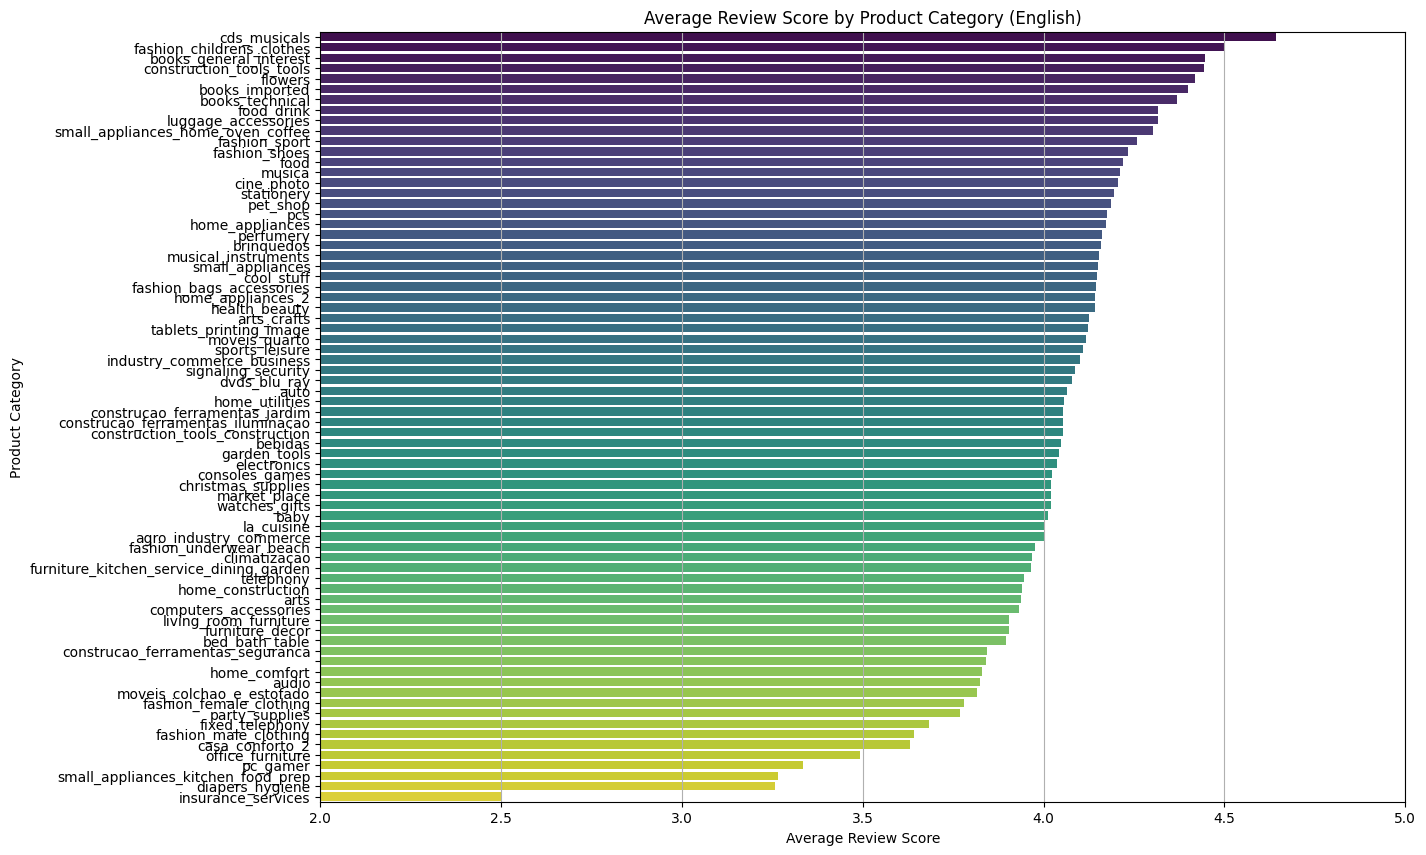

In [ ]:
# What is the average review score by product?
#Are there product categories that drive dissatisfaction?
# Average Review Score by Product Category (Translated)

product_reviews = df.groupby('product_category_name_english')['review_score'].agg(['mean','median','count']).reset_index()
product_reviews_sorted = product_reviews.sort_values(by='mean', ascending=False)
plt.figure(figsize=(14, 10))
sns.barplot(data=product_reviews_sorted, x='mean', y='product_category_name_english', palette="viridis")
plt.title('Average Review Score by Product Category (English)')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.xlim(2.0, 5.0)
plt.grid(axis='x')
plt.show()


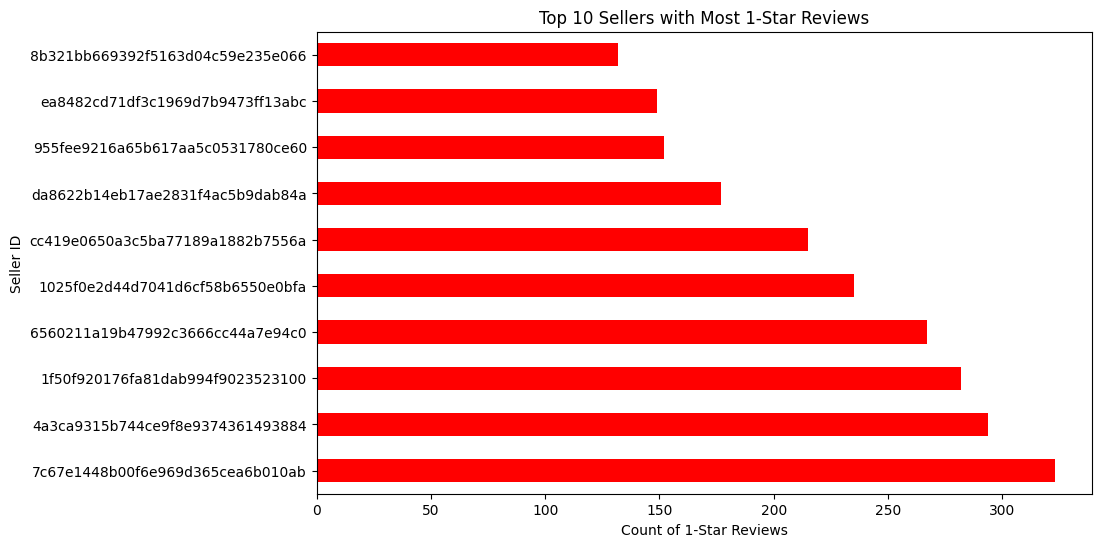

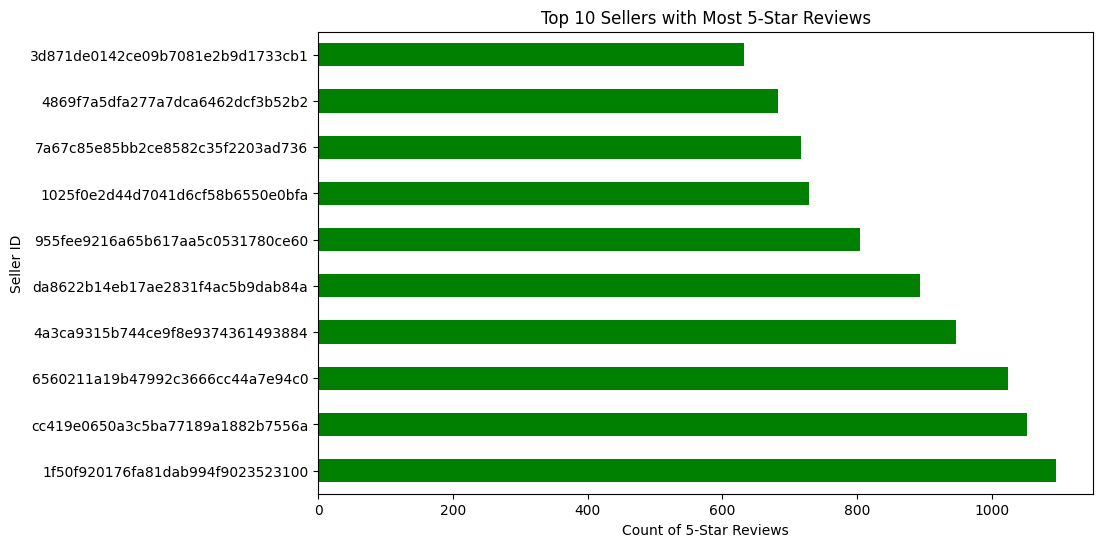

In [ ]:
#Which sellers receive the most 1-star and 5-star reviews?
#Sellers with Most 1-star and 5-star Reviews
seller_reviews = df.groupby(['seller_id', 'review_score']).size().unstack().fillna(0)
top_1_star = seller_reviews[1].sort_values(ascending=False).head(10)
top_5_star = seller_reviews[5].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_1_star.plot(kind='barh', color='red')
plt.title('Top 10 Sellers with Most 1-Star Reviews')
plt.xlabel('Count of 1-Star Reviews')
plt.ylabel('Seller ID')
plt.show()
plt.figure(figsize=(10,6))
top_5_star.plot(kind='barh', color='green')
plt.title('Top 10 Sellers with Most 5-Star Reviews')
plt.xlabel('Count of 5-Star Reviews')
plt.ylabel('Seller ID')
plt.show()

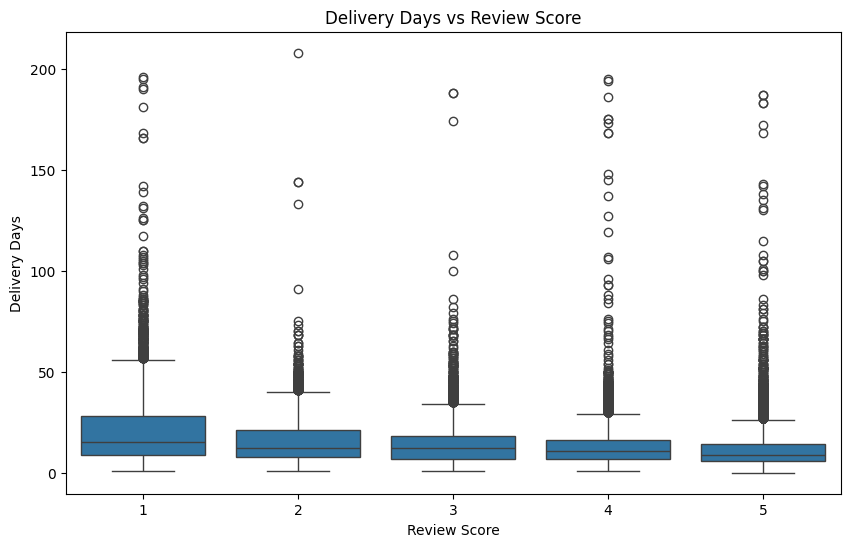

In [ ]:
# Do review scores vary with delivery time or order value?
# Delivery Days vs Review Score
plt.figure(figsize=(10,6))
sns.boxplot(x='review_score', y='delivery_days', data=df)
plt.title('Delivery Days vs Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Days')
plt.show()

In [ ]:
# Financial Impact Modeling
avg_order_value = df['price'].mean() + df['freight_value'].mean()
repeat_purchase_rate = 3
customer_lifetime_years = 2
profit_margin = 0.25
operational_saving_per_delay_day = 1.50

unhappy_orders = df[df['review_score'].isin([1, 2])]
unhappy_count = unhappy_orders.shape[0]
lost_revenue = unhappy_count * avg_order_value
lost_profit = lost_revenue * profit_margin
churn_loss = unhappy_count * avg_order_value * repeat_purchase_rate * customer_lifetime_years
churn_profit_loss = churn_loss * profit_margin
total_delay_days = df['delivery_delay'].fillna(0).sum()
operational_saving = total_delay_days * operational_saving_per_delay_day

summary = pd.DataFrame({
    'Metric': [
        'Lost Revenue (Unhappy Orders)',
        'Lost Profit (Unhappy Orders)',
        'Lifetime Revenue Churn Loss',
        'Lifetime Profit Churn Loss',
        'Operational Savings (Delay Fix)'
    ],
    'Amount (USD)': [
        lost_revenue,
        lost_profit,
        churn_loss,
        churn_profit_loss,
        operational_saving
    ]
})
summary['Amount (USD)'] = summary['Amount (USD)'].map('${:,.2f}'.format)
display(summary)

,Metric,Amount (USD)
0,Lost Revenue (Unhappy Orders),"$2,543,556.24"
1,Lost Profit (Unhappy Orders),"$635,889.06"
2,Lifetime Revenue Churn Loss,"$15,261,337.44"
3,Lifetime Profit Churn Loss,"$3,815,334.36"
4,Operational Savings (Delay Fix),"$2,001,055.50"
